In [97]:
#importing necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline

In [14]:
Reddit = pd.read_csv("/content/Reddit.csv")
#getting first 5 rows
Reddit.head()

,Unnamed: 0,Title,Upvote_ratio,Score,Gilded,Over_18,Number_of_Comments
0,0,House impeaches Trump for second time over Cap...,0.72,39464,2,False,8801
1,1,I'm a 16 yr old blacksmith and I forged this w...,0.90,29423,0,False,443
2,2,Do some research before spouting nonsense,0.90,50420,0,False,1008
3,3,Moving boxes arrive at the White House,0.81,149858,6,False,4392
4,4,“No One Took Us Seriously”: Black Cops Warned ...,0.98,7768,0,False,157


In [15]:
final = pd.read_csv("/content/final.csv")
final.head()

,Unnamed: 0,Title,Upvote_ratio,Score,Gilded,Over_18,Number_of_Comments,neg,neu,pos,compound
0,0,House impeaches Trump for second time over Cap...,0.72,39464,2,False,8801,0.292,0.708,0.000,-0.5106
1,1,I'm a 16 yr old blacksmith and I forged this w...,0.90,29423,0,False,443,0.000,0.633,0.367,0.8268
2,2,Do some research before spouting nonsense,0.90,50420,0,False,1008,0.351,0.649,0.000,-0.4019
3,3,Moving boxes arrive at the White House,0.81,149858,6,False,4392,0.000,1.000,0.000,0.0000
4,4,“No One Took Us Seriously”: Black Cops Warned ...,0.98,7768,0,False,157,0.319,0.681,0.000,-0.7269


In [16]:
embedded = pd.read_csv("/content/embedded.csv")
embedded.head()

,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
0,0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0...
1,0.08 0.39 0.90 -0.30 -0.33 0.60 0.23 0.59 0.13...
2,-0.27 0.82 0.70 -0.72 0.09 0.20 -0.52 -0.24 -0...
3,-0.02 -0.03 0.36 -0.02 -0.55 0.32 0.01 0.35 -0...
4,-0.04 0.19 0.66 -0.49 0.32 -0.34 -0.07 0.31 -0...


In [17]:
tokens = pd.read_csv("/content/tokens.csv")
tokens.head()

,just,like,time,new,im,dont,trump,year,day,capitol,got,think,irl,good,say,love,game,know,today,guy,make,people,right,cursed,friend,want,best,post,meme,look,old,did,really,work,man,thats,finally,art,video,2,...,taytinabelle,remained,lockerroom,jeff,mushka,closeup,potriate,phillips,port,monomyth,emerald,rom,hack,48th,giancarlo,fisichella,2005,seagull,tent,bt,unexpectedly,mole,happening,rangerrogue,multiclass,curlyhorned,humanfaced,viii,1511,ally,rjadenanimations,jaden,reposting,riyo,pawper,barbies,alain,medalist,klete,keller
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,10322,10323,10324,10325,10326,10327,10328,10329,10330,10331,10332,10333,10334,10335,10336,10337,10338,10339,10340,10341,10342,10343,10344,10345,10346,10347,10348,10349,10350,10351,10352,10353,10354,10355,10356,10357,10358,10359,10360,10361


In [ ]:
#cheking if there is any missing value is present in the data

In [25]:
Reddit.isnull().sum()

Unnamed: 0            0
Title                 0
Upvote_ratio          0
Score                 0
Gilded                0
Over_18               0
Number_of_Comments    0
dtype: int64

In [26]:
final.isnull().sum()

Unnamed: 0            0
Title                 0
Upvote_ratio          0
Score                 0
Gilded                0
Over_18               0
Number_of_Comments    0
neg                   0
neu                   0
pos                   0
compound              0
dtype: int64

In [27]:
embedded.isnull().sum()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99    0
dtype: int64

In [28]:
tokens.isnull().sum()

just        0
like        0
time        0
new         0
im          0
           ..
barbies     0
alain       0
medalist    0
klete       0
keller      0
Length: 10361, dtype: int64

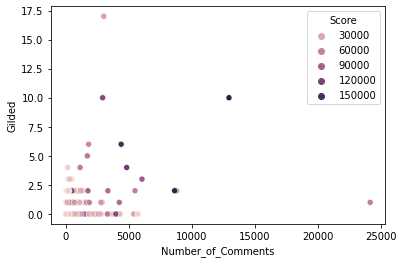

In [103]:
#data visualization between dependent and independent variables
#scatter plot
sns.scatterplot(x=Reddit['Number_of_Comments'], y=Reddit['Gilded'], hue=Reddit['Score'])

In [29]:
#preparing data for modeling 
#independent variable
y = final.Score

In [30]:
final_features = ['Gilded','Number_of_Comments']

In [31]:
#dependent variable
x = final[final_features]

In [21]:
x.describe()

,Gilded,Number_of_Comments
count,7471.000000,7471.000000
mean,0.054477,100.394191
std,0.382486,452.414870
min,0.000000,0.000000
25%,0.000000,10.000000
50%,0.000000,26.000000
75%,0.000000,73.000000
max,17.000000,24155.000000


In [22]:
x.head()

,Gilded,Number_of_Comments
0,2,8801
1,0,443
2,0,1008
3,6,4392
4,0,157


In [ ]:
# DecisionTree model

In [33]:
from sklearn.tree import DecisionTreeRegressor
final = DecisionTreeRegressor(random_state=1)
final.fit(x, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [34]:
print("Making predictions for the following:")
print(x.head())
print("The predictions are")
print(final.predict(x.head()))

Making predictions for the following:
   Gilded  Number_of_Comments
0       2                8801
1       0                 443
2       0                1008
3       6                4392
4       0                 157
The predictions are
[ 39464.          15073.5         50420.         149858.
  11194.66666667]


In [49]:
%%time
from sklearn.metrics import mean_absolute_error

predicted_Score = final.predict(x)
mean_absolute_error(y, predicted_Score)

CPU times: user 4.56 ms, sys: 0 ns, total: 4.56 ms
Wall time: 4.99 ms


In [61]:
%%time
from sklearn.model_selection import train_test_split
# run this script.
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 0)
# Define model
final = DecisionTreeRegressor()
# Fit model
final.fit(train_x, train_y)
# get predicted on validation data
val_predictions = final.predict(val_x)
descision_model1 = print(mean_absolute_error(val_y, val_predictions))


3189.4024491540426
CPU times: user 12.1 ms, sys: 1.01 ms, total: 13.1 ms
Wall time: 13.5 ms


In [ ]:
# Random forest model

In [62]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor()
forest_model.fit(train_x, train_y)
Randomforest_preds = forest_model.predict(test_x)
forest_model1 = print(mean_absolute_error(test_y, Randomforest_preds))

3096.7858184232523
CPU times: user 381 ms, sys: 4.74 ms, total: 386 ms
Wall time: 390 ms


In [ ]:
# KNeighbors model

In [96]:
%%time
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
KNN_model = KNeighborsRegressor()
KNN_model.fit(train_x, train_y)
KNN_preds = KNN_model.predict(test_x)
KNN_model1 = print(mean_absolute_error(test_y, KNN_preds))

3175.834796573876
CPU times: user 11.9 ms, sys: 0 ns, total: 11.9 ms
Wall time: 17.9 ms


In [ ]:
#LinearRegression model

In [93]:
%%time
from sklearn.metrics import r2_score
from sklearn import linear_model
regr_model = linear_model.LinearRegression()
regr_model.fit(x, y)
regr_pred = regr_model.predict(test_x)
regr_model1 = print(mean_absolute_error(test_y, regr_pred))
r2_score(test_y, regr_pred)
print('r2 score for perfect model is', r2_score) 

3668.929290229945
r2 score for perfect model is <function r2_score at 0x7ff18394d950>
CPU times: user 5.16 ms, sys: 0 ns, total: 5.16 ms
Wall time: 10.5 ms


In [41]:
#this dict will help us in comparison between models
model_performance_dict = {
    "descision_model1":"3369.262972161211", 
                          "forest_model1":"2846.361829403519", 
                          "KNN_model1":"3097.423554603854", 
                          "regr_model1":"3633.482603339038"
}
print(model_performance_dict)

{'descision_model1': '3369.262972161211', 'forest_model1': '2846.361829403519', 'KNN_model1': '3097.423554603854', 'regr_model1': '3633.482603339038'}


In [42]:
#comparison between model 
#preparing data for barplot
def model_comparison(model_performance_dict, sort_by = 'RMSE', metric = 'RMSE'):

    Rsq_list = []
    RMSE_list = []
    MAE_list = []
    for key in model_performance_dict.keys():
        Rsq_list.append(model_performance_dict[key][0])
        RMSE_list.append(model_performance_dict[key][1])
        MAE_list.append(model_performance_dict[key][2])

    props = pd.DataFrame([])

    props["R-squared"] = Rsq_list
    props["RMSE"] = RMSE_list
    props["MAE"] = MAE_list
    props.index = model_performance_dict.keys()
    props = props.sort_values(by = sort_by)

    fig, ax = plt.subplots(figsize = (12,6))

    ax.bar(props.index, props[metric], color="blue")
    plt.title(metric)
    plt.xlabel('Model')
    plt.xticks(rotation = 45)
    plt.ylabel(metric)

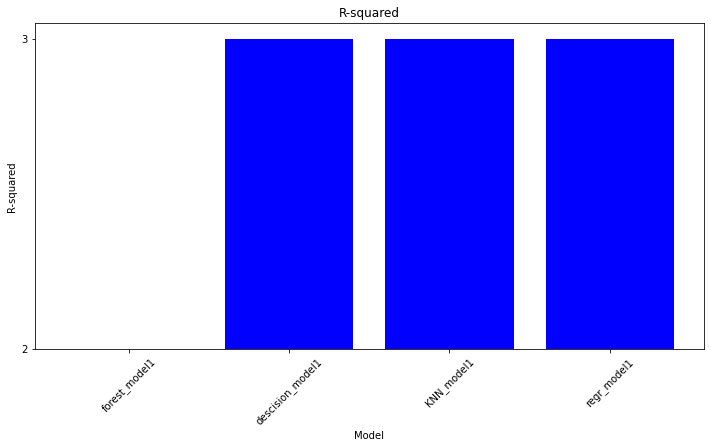

In [43]:
model_comparison(model_performance_dict, sort_by = 'R-squared', metric = 'R-squared')

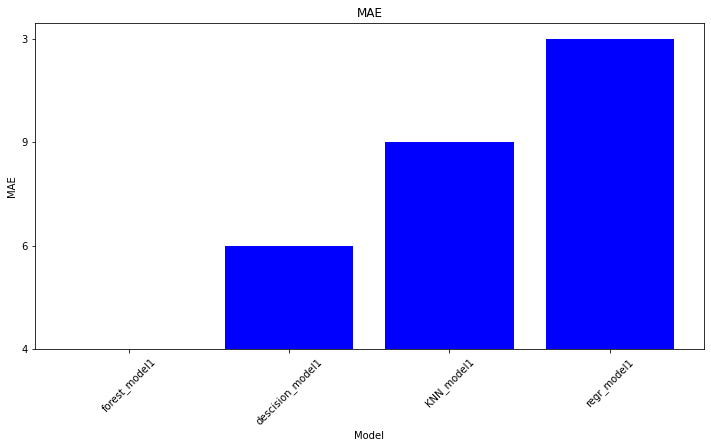

In [46]:
model_comparison(model_performance_dict, sort_by = 'R-squared', metric = 'MAE')

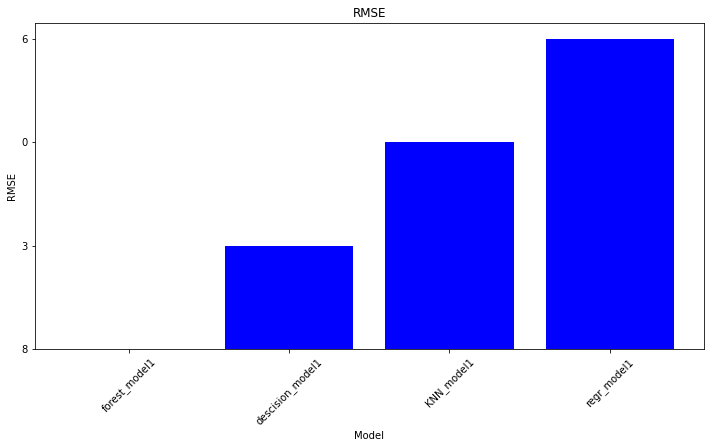

In [45]:
model_comparison(model_performance_dict, sort_by = 'R-squared', metric = 'RMSE')

here, i took KNN model 

In [78]:
from sklearn.neighbors import KNeighborsClassifier
# testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using []
scores = []

# we use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x,train_y)
    y_pred = knn.predict(test_x)
    scores.append(metrics.accuracy_score(test_y,y_pred))

print(scores)

[0.0016059957173447537, 0.0026766595289079227, 0.0016059957173447537, 0.0016059957173447537, 0.0021413276231263384, 0.0021413276231263384, 0.0010706638115631692, 0.0010706638115631692, 0.0010706638115631692, 0.0010706638115631692, 0.0010706638115631692, 0.0010706638115631692, 0.0010706638115631692, 0.0010706638115631692, 0.0005353319057815846, 0.0005353319057815846, 0.0005353319057815846, 0.0005353319057815846, 0.0005353319057815846, 0.0005353319057815846, 0.0005353319057815846, 0.0010706638115631692, 0.0010706638115631692, 0.0010706638115631692, 0.0010706638115631692]


Text(0, 0.5, 'Testing Accuracy')

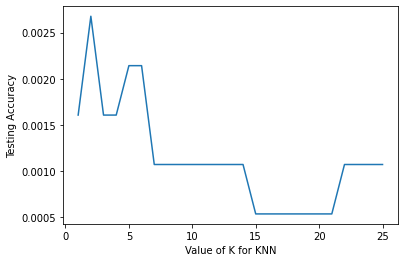

In [80]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')